## Микишева Мария Б03-212 Задание Т2

In [468]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import random as rd
import pandas as pd
import numpy as np
from scipy.special import comb

# Генерация выборки

In [2]:
def generage_sample(n=25):
    return np.random.default_rng().exponential(scale=1, size=n)

In [470]:
n = 25
sample = generage_sample()
var = np.sort(sample)    

In [471]:
var

array([0.00369514, 0.07348404, 0.11838681, 0.14232033, 0.22205756,
       0.23819401, 0.30332566, 0.36596338, 0.38844547, 0.48769538,
       0.61458953, 0.6763877 , 0.72358208, 0.797589  , 0.84072126,
       0.86745508, 0.87046583, 0.97546069, 1.06117001, 1.17909675,
       1.20676091, 1.88356358, 2.25263508, 2.31573816, 3.07685083])

# а)

## Определение моды:

In [472]:
st.mode(var)

ModeResult(mode=0.003695144177374793, count=1)

Все значения являются модами

## Определение медианы:

In [473]:
np.median(var)

0.7235820751072312

## Определение размаха:

In [474]:
rng = np.max(var) - np.min(var)

In [475]:
rng

3.0731556846064922

## Определение коэффициента асимметрии:

In [476]:
skew = st.skew(var, bias=True)
skew_correct = st.skew(var, bias=False)

In [477]:
skew

1.321272267969656

In [478]:
skew_correct

1.4071490729632778

# b)

## Эмпирическая функция распределения

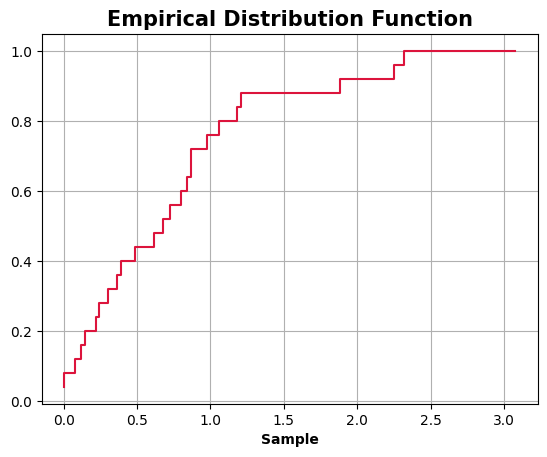

In [479]:
unique, counts = np.unique(sample, return_counts=True)
prob = np.cumsum(counts)/n

plt.plot(var, prob, drawstyle='steps', color="crimson")
plt.grid()

plt.title('Empirical Distribution Function', fontsize=15,  fontweight='bold')
plt.xlabel('Sample', fontsize=10, fontweight='bold')

plt.show()

## Гистограмма

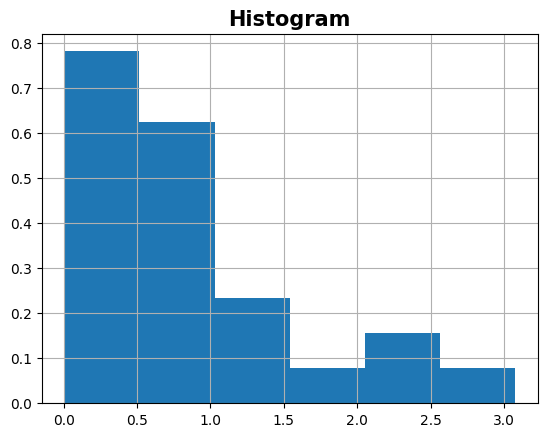

In [480]:
fig, ax = plt.subplots()

k = 1 + int(round(np.log2(len(sample))))
 
ax.hist(sample, density=True, bins=k)

ax.set_title('Histogram', fontsize=15,  fontweight='bold')

plt.grid()
plt.show()

## Построение boxplot.

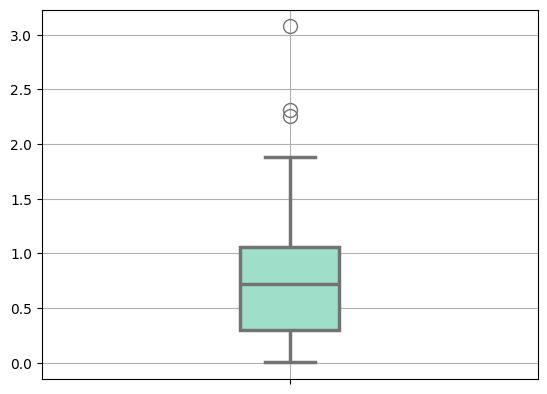

In [481]:
fig, ax = plt.subplots()

sns.boxplot(sample, linewidth=2.5, width=.2, 
            color='aquamarine', saturation=0.5, fliersize=10)

plt.grid()
plt.show()

#  с)

## Оценка плотности распределения среднего значения

**Задание**: определить плотность распределения среднего арифметического элементов выборки. Сравнить с бутстраповской оценкой плотности. 

### Определение плотности распределения. 

По ЦПТ Ляпунова

In [482]:
mean = np.mean(sample)
disp = np.sum((sample - mean) ** 2) / (len(sample) - 1)

print(f'Disp = {disp}', f'Mean = {mean}', sep='\n')

Disp = 0.6057354741135981
Mean = 0.8674253712592137


In [483]:
def distribution(mean=0, disp=1):
    
    
    x = np.linspace(-10, 10, 10000)
        
    y = np.exp((-1) * (x - mean) ** 2 / (2 * disp)) / (np.sqrt(disp * 2 * np.pi))
      
    plt.plot(x, y, color='crimson', label=f'd = {round(disp, 2)}, <x> = {round(mean, 2)}')
           
    plt.legend()

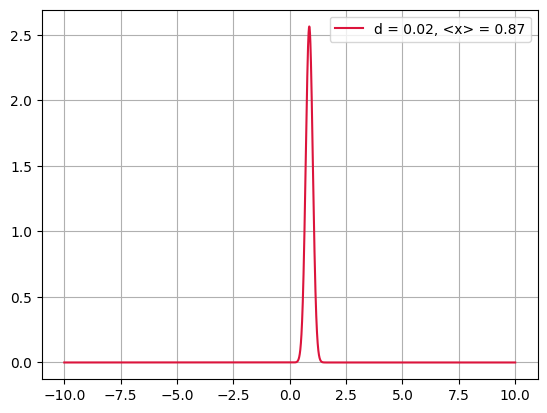

In [484]:
distribution(mean, disp/len(sample))

plt.grid()
plt.show()

### Оценка плотности при помощи bootstrap.

In [485]:
def calc_bootstrap_mean(sample, size):

    
    boots_mean = []
    
    for i in range(0, size):
        
        subsample = np.array([rd.choice(sample) for i in range(len(sample))])
        boots_mean.append(np.mean(subsample))
        
    return boots_mean

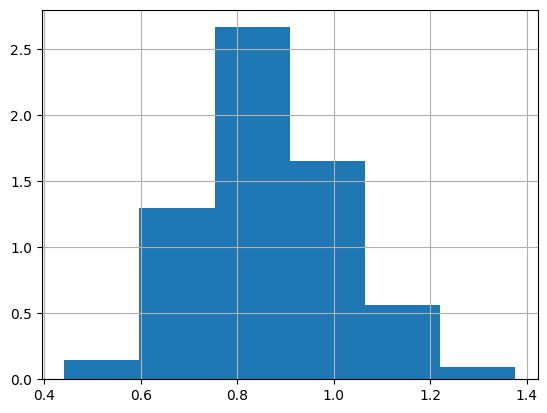

In [486]:
bootstrap_mean = calc_bootstrap_mean(sample, 1000)

k = 1 + int(round(np.log2(len(sample))))

plt.hist(bootstrap_mean, density=True, bins=k)

plt.grid()
plt.show()

## Сравнение

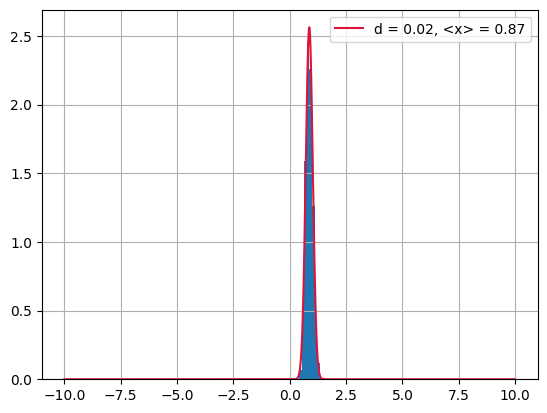

In [487]:
distribution(mean, disp/len(sample))

bootstrap_mean = calc_bootstrap_mean(sample, 10000)

plt.hist(bootstrap_mean, density=True)

plt.grid()
plt.show()

# e)

bootstrap-оценка плотности распределения коэффициента асимметрии

In [488]:
def calc_bootstrap_skew(sample, size):
   
    boots_skew = []
    
    for i in range(0, size):
        
        subsample = np.array([rd.choice(sample) for i in range(len(sample))])
        boots_skew.append(st.skew(subsample))
        
    return boots_skew

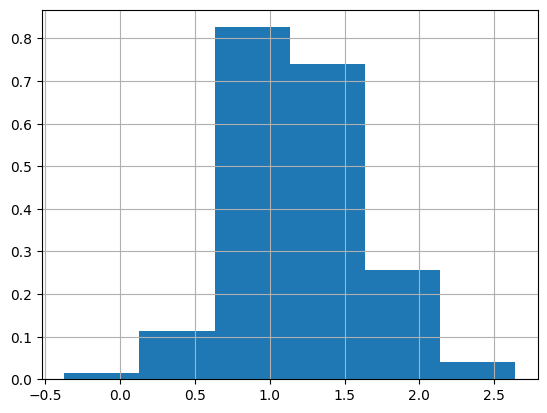

In [489]:
bootstrap_mean = calc_bootstrap_skew(sample, 1000)

k = 1 + int(round(np.log2(len(sample))))

plt.hist(bootstrap_mean, density=True, bins=k)

plt.grid()
plt.show()

# f)

$
F(x) = 1 - e^{-x}\\
h(x) =  n * e^{-x} * C_{n-1}^{k-1} * (F(x))^{k-1} * (1 - F(x))^{n-k}
$

In [490]:
def distribution_med(k=13, n=25):
    
    x = np.linspace(0, 2, 10000)
        
    h = n*int(comb(n-1, k-1, exact=True))*np.exp(-(k)*x)*((1-np.exp(-x))**(n-k))
      
    plt.plot(x, h, color='r')

In [491]:
def calc_bootstrap_med(sample, size):
   
    boots_med = []
    
    for i in range(0, size):
        
        subsample = np.array([rd.choice(sample) for i in range(len(sample))])
        boots_med.append(np.median(subsample))
        
    return boots_med

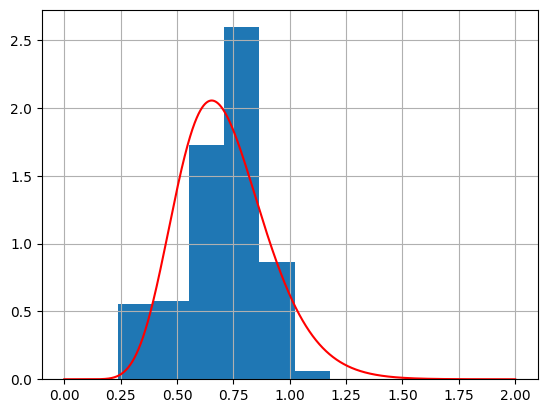

In [492]:
distribution_med()

bootstrap_med = calc_bootstrap_med(sample, 1000)

k = 1 + int(round(np.log2(len(sample))))

plt.hist(bootstrap_med, density=True, bins=k)

plt.grid()
plt.show()